## Replace this text with your name

In the cell below, include **all** your ``import`` statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Use Heun's method to calculate the trajectory of a particle undergoing projectile motion with initial conditions $(x, y) = (0, 0)$ and $(v_x, v_y) = (30, 40)~{\rm m/s}$. In doing so, you should
- use a time stepping function that uses the powers of arrays as both inputs and outputs to your function (you should also use an energy function that takes an array as an input)
- make two separate plots: (1) y vs. x; and (2) energy vs. time

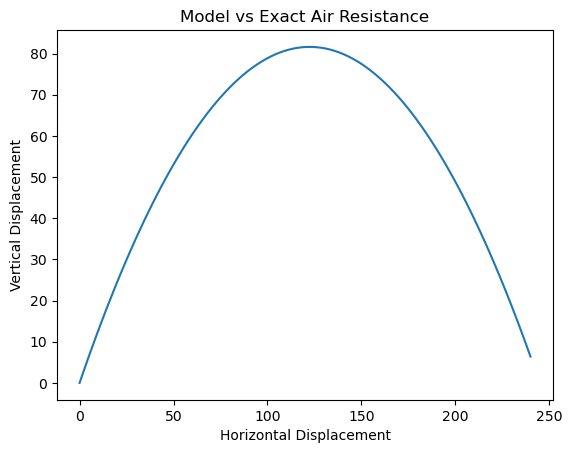

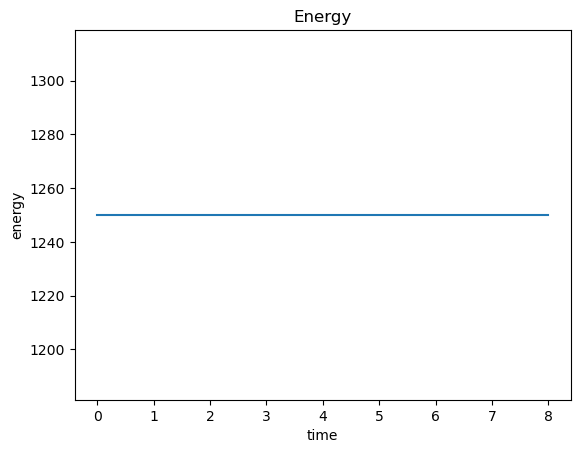

In [2]:


time = np.linspace(0,8,100)
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

dt = time[1] - time[0]
x = 0
y = 0
vx = 30
vy = 40
ax = 0 
ay= -9.8
g=ay
x_in = np.zeros(4)
x_in = [x,y,vx,vy]
x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]
ET = np.zeros(len(time))
def xfh(x_in,dt):
    derivative1 = np.zeros(4)
    derivative1[:] = [x_in[2], x_in[3], ax, ay]
    k1 = derivative1 * dt
    derivative2 = np.zeros(4)
    derivative2[:] = [x_in[2]+k1[2], x_in[3]+k1[3], ax, ay] 
    k2 = derivative2 * dt 
    x_final = x_in + 0.5 * (k1+k2)
    return x_final

def Energy(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) +g*y

def energy_function_array(x_in):
    return ET(x_in[0], x_in[1], x_in[2], x_in[3])
ET[0] = Energy(x,y,vx,vy)
for i in range(1,len(time)):
    x_array = xfh(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    ET[i] = Energy(x,y,vx,vy)


plt.figure()
plt.plot(x_step, y_step)
plt.xlabel('Horizontal Displacement')
plt.ylabel('Vertical Displacement')
plt.title('Model vs Exact Air Resistance')
plt.figure()
plt.plot(time, ET)
plt.title('Energy')
plt.xlabel('time')
plt.ylabel('energy')
plt.show()





**Exercise:** Include air resistance:
$$\displaystyle \frac{dx}{dt} = v_x \qquad \qquad \frac{d v_x}{dt} = a_x = - b v_x$$
$$\displaystyle \frac{dy}{dt} = v_y \qquad \qquad \frac{d v_y}{dt} = a_y = -g - b v_y$$
using $g = 9.8$ and $b = 0.1$. 
- Again, we will use Heun's method with functions that work with arrays
- make two separate plots: (1) y vs. x; and (2) energy vs. time

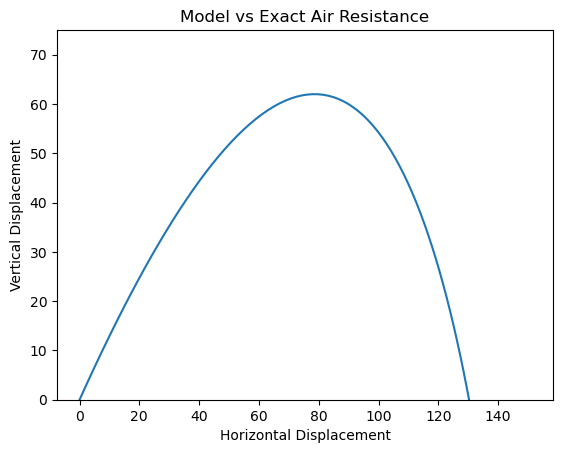

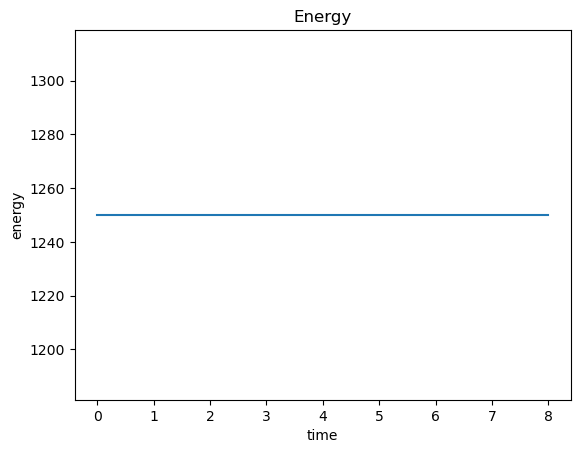

In [3]:

time = np.linspace(0,8,100)
dt = time[1] - time[0]
x = 0
y = 0
vx = 30
vy = 40
ax = -0.1*vx 
ay= -9.8-(0.1*vy)
x_in = np.zeros(4)
x_in = [x,y,vx,vy]
x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]
ET = np.zeros(len(time))
def xfh(x_in,dt):
    derivative1 = np.zeros(4)
    derivative1[:] = [x_in[2], x_in[3], ax, ay]
    k1 = derivative1 * dt
    derivative2 = np.zeros(4)
    derivative2[:] = [x_in[2]+k1[0], x_in[3]+k1[1], ax, ay] 
    k2 = derivative2 * dt 
    x_final = x_in + 0.5 * (k1+k2)
    return x_final

def Energy(x,y,vx,vy):
    return 0.5*(vx**2 + vy**2) +g*y

def energy_function_array(x_in):
    return ET(x_in[0], x_in[1], x_in[2], x_in[3])
ET[0] = Energy(x,y,vx,vy)
for i in range(1,len(time)):
    x_array = xfh(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    ET[i] = Energy(x,y,vx,vy)


plt.figure()
plt.plot(x_step, y_step)
plt.xlabel('Horizontal Displacement')
plt.ylabel('Vertical Displacement')
plt.title('Model vs Exact Air Resistance')
plt.ylim(0,75)
plt.figure()
plt.plot(time, ET)
plt.title('Energy')
plt.xlabel('time')
plt.ylabel('energy')
plt.show()





Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.